In [1]:

from workflow import app
from langgraph.types import Command

In [3]:
initial_state = {
    "email_content": "I was charged twice for my subscription! This is urgent!",
    "sender_email": "customer@example.com",
    "email_id": "email_123",
    "messages": []
}

# Run with a thread_id for persistence
config = {"configurable": {"thread_id": "customer_123"}}
result = app.invoke(initial_state, config)

# The graph will pause at human_review
# 验证方法1: 检查返回的中断信息
print("=== 中断信息 ===")
print(f"Email ID: {result.get('email_id', 'N/A')}")
print(f"Original email: {result.get('original_email', 'N/A')}")
print(f"Action: {result.get('action', 'N/A')}")
print(f"Urgency: {result.get('urgency', 'N/A')}")
print(f"Intent: {result.get('intent', 'N/A')}")

# 验证方法2: 检查状态快照
state_snapshot = app.get_state(config)
print(f"\n=== 状态快照 ===")
print(f"下一个节点: {state_snapshot.next}")
print(f"当前状态值: {state_snapshot.values}")

# 验证方法3: 打印完整结果
print(f"\n=== 完整结果 ===")
print(result)

=== 中断信息 ===
Email ID: email_123
Original email: N/A
Action: N/A
Urgency: N/A
Intent: N/A

=== 状态快照 ===
下一个节点: ('human_review',)
当前状态值: {'email_content': 'I was charged twice for my subscription! This is urgent!', 'sender_email': 'customer@example.com', 'email_id': 'email_123', 'classification': {'intent': 'billing', 'urgency': 'high', 'topic': 'subscription charge', 'summary': 'Customer reports being charged twice for their subscription and considers it urgent.'}, 'messages': [HumanMessage(content='Processing email: I was charged twice for my subscription! This is urgent!', additional_kwargs={}, response_metadata={})]}

=== 完整结果 ===
{'email_content': 'I was charged twice for my subscription! This is urgent!', 'sender_email': 'customer@example.com', 'email_id': 'email_123', 'classification': {'intent': 'billing', 'urgency': 'high', 'topic': 'subscription charge', 'summary': 'Customer reports being charged twice for their subscription and considers it urgent.'}, 'messages': [HumanMessag

In [4]:
human_response = Command(
    resume={
        "approved": True,
        "edited_response": "We sincerely apologize for the double charge. I've initiated an immediate refund..."
    }
)

# Resume execution
final_result = app.invoke(human_response, config)
print(f"Email sent successfully!")

Sending reply: We sincerely apologize for the double charge. I've initiated an immediate refund......
Email sent successfully!


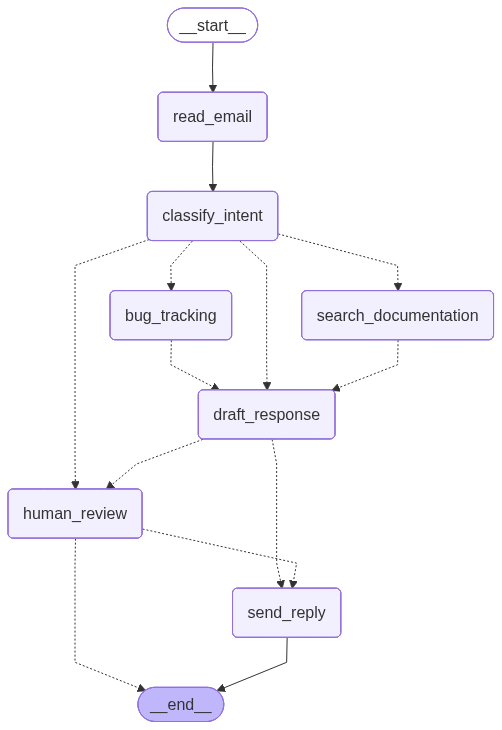

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [5]:
# 测试另一个场景：question 类型邮件（会经过 draft_response）
question_state = {
    "email_content": "How do I reset my password?",
    "sender_email": "user@example.com",
    "email_id": "email_456",
    "messages": []
}

config2 = {"configurable": {"thread_id": "user_456"}}
result2 = app.invoke(question_state, config2)

print("=== Question 类型邮件结果 ===")
print(f"下一个节点: {app.get_state(config2).next}")
print(f"是否有 draft_response: {'draft_response' in result2}")
if 'draft_response' in result2:
    print(f"Draft: {result2['draft_response'][:200]}...")

Sending reply: Subject: Instructions for Resetting Your Password

Dear [Customer's Name],

Thank you for reaching o...
=== Question 类型邮件结果 ===
下一个节点: ()
是否有 draft_response: True
Draft: Subject: Instructions for Resetting Your Password

Dear [Customer's Name],

Thank you for reaching out to us. I'm here to assist you with resetting your password.

To reset your password, please follo...
